In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from PIL import Image, ImageDraw, ImageFont
from IPython.display import display

In [10]:
# RGB values from 0 to 255
from color_data import colors
training_codes = [color[1] for color in colors]
training_labels = [color[0] for color in colors]

In [11]:
clf_svm = svm.SVC()

In [12]:
clf_svm.fit(training_codes, training_labels)

SVC()

In [13]:
NUMBER_OF_TESTING_COLORS = 100
testing_codes = np.random.randint(0, 255, (NUMBER_OF_TESTING_COLORS, 3))

In [14]:
labels_svm = clf_svm.predict(testing_codes)

In [15]:
# for label_svm, code in zip(labels_svm, testing_codes):
#     image = np.ones((20, 200, 3)) * code / 255
#     plt.imshow(image)
#     plt.axis("off")
#     plt.title("{} - SVM: {}".format(code, label_svm))
#     plt.show()

1200 750


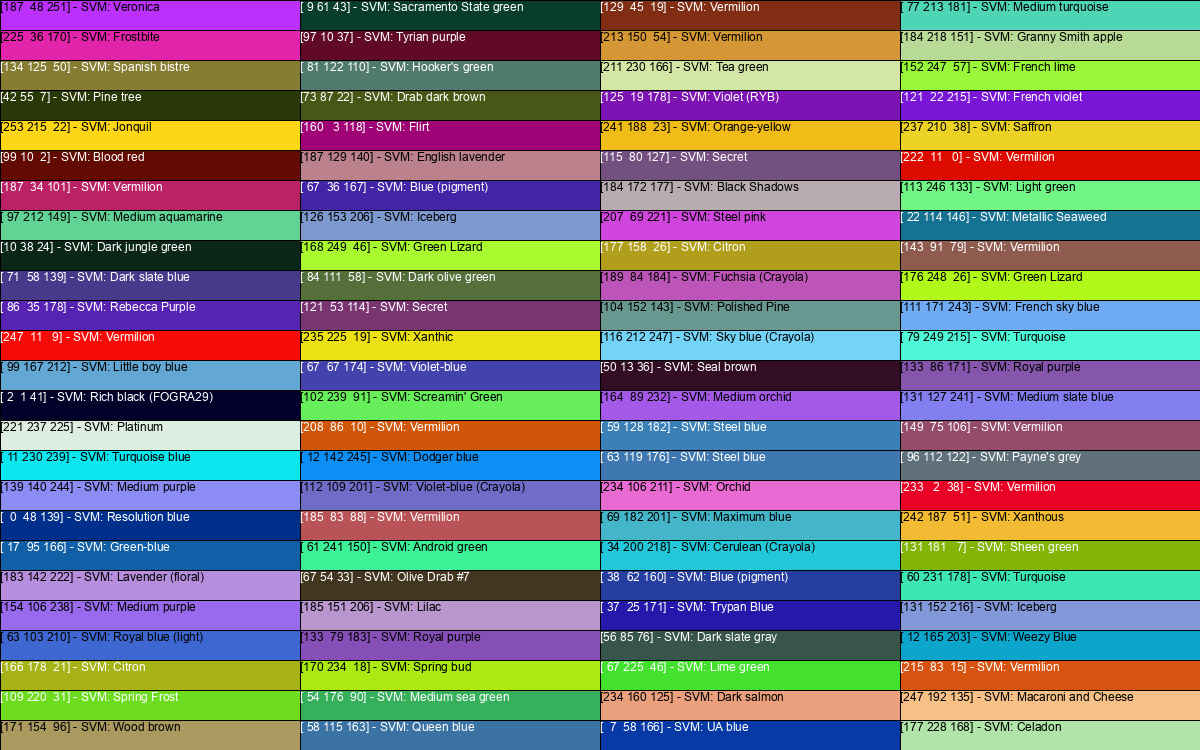

In [16]:
iterator = zip(labels_svm, testing_codes)

NUMBER_OF_COLORS = NUMBER_OF_TESTING_COLORS
NUMBER_OF_COLUMNS = 4
TEXT_SIZE = 12
COLOR_BOX_WIDTH = 300
COLOR_BOX_HEIGHT = 30

NUMBER_OF_ROWS = NUMBER_OF_COLORS // NUMBER_OF_COLUMNS
IMAGE_WIDTH = NUMBER_OF_COLUMNS * COLOR_BOX_WIDTH
IMAGE_HEIGHT = NUMBER_OF_ROWS * COLOR_BOX_HEIGHT

# Load font
font = None
try:
    font = ImageFont.truetype("arial.ttf", size=TEXT_SIZE)
except:
    print("Cannot load Arial.ttf")
    font = ImageFont.load_default()

# Create image
img = Image.new("RGB", (IMAGE_WIDTH, IMAGE_HEIGHT))
img_canvas = ImageDraw.Draw(img)
img_canvas.rectangle([(0, 0), (IMAGE_WIDTH, IMAGE_HEIGHT)], fill=(255, 255, 255))

for x in range(NUMBER_OF_COLUMNS):
    for y in range(NUMBER_OF_ROWS):
        label, color = next(iterator)
        # Draw color box with text
        # color = tuple(np.uint(np.random.random(3) * 255))
        text_color = (0, 0, 0) if np.average(color) > 125 else (255, 255, 255)
        text = "{} - SVM: {}".format(color, label)
        img_canvas.rectangle([x * COLOR_BOX_WIDTH, y * COLOR_BOX_HEIGHT, (x + 1) * COLOR_BOX_WIDTH, (y + 1) * COLOR_BOX_HEIGHT], fill=tuple(color), outline=(0, 0, 0))
        img_canvas.text(xy=(x * COLOR_BOX_WIDTH, y * COLOR_BOX_HEIGHT), text=text, fill=text_color, font=font)

print(IMAGE_WIDTH, IMAGE_HEIGHT)
display(img)